<a href="https://colab.research.google.com/github/GitShamil/ML_homeworks/blob/main/HW_Matplotlib_sns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [199]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [200]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [201]:
data.isna().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

In [202]:
numeric_features= ['duration','amount','age']
categorical_features = ['status', 'credit_history', 'purpose','personal_status_sex','other_debtors','property','other_installment_plans','housing','job']
categorical_binary_features = ['telephone','foreign_worker','credit_risk']
ordinal_features = ['savings','employment_duration','installment_rate','number_credits','people_liable', 'present_residence']

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [203]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [204]:
people_under_30 = data[data['age'] < 30]
share = sum(people_under_30['housing'] == 'rent') / len(people_under_30)
print(f'share of people under 30 rent a home: {share}')
people_upper_40 = data[data['age'] > 40]
share = sum(people_upper_40['housing'] == 'rent') / len(people_upper_40)
print(f'share of people upper 40 rent a home: {share}')

share of people under 30 rent a home: 0.6666666666666666
share of people upper 40 rent a home: 0.6801470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [205]:
foreign_people = data[data['foreign_worker'] == 'yes']
share = sum((foreign_people['number_credits'] == '4-5') | (foreign_people['number_credits'] == '>= 6'))
print(f'number of foreign_worker with more than 3 credits: {share}')

number of foreign_worker with more than 3 credits: 1


### Задание 6 (1 балл)

In [206]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

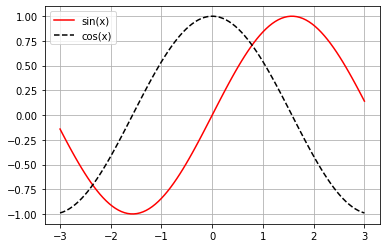

In [207]:
x = np.linspace(-3,3,100)
plt.plot(x, np.sin(x), color = 'red', label = 'sin(x)')
plt.plot(x, np.cos(x), '--',color = 'black', label = 'cos(x)')
plt.grid()
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [208]:
good_risk = data.groupby('status')['credit_risk'].apply(lambda x: (x=='good').sum())
good_risk.index

Index(['... < 0 DM', '... >= 200 DM / salary for at least 1 year',
       '0<= ... < 200 DM', 'no checking account'],
      dtype='object', name='status')

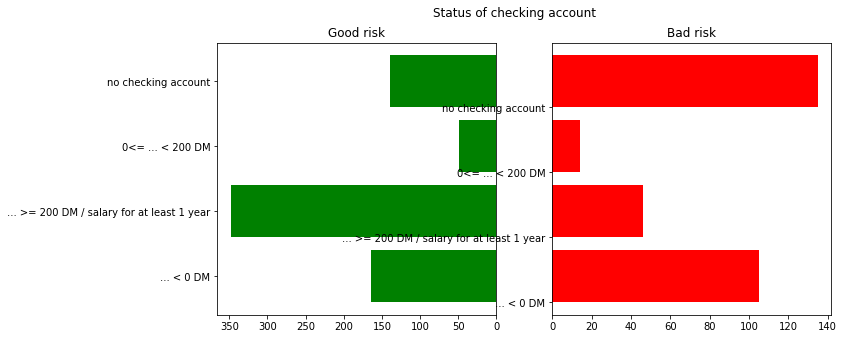

In [209]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
good_risk = data.groupby('status')['credit_risk'].apply(lambda x: (x=='good').sum())
ax[0].barh(good_risk.index, good_risk, color = 'green')
ax[0].invert_xaxis()
ax[0].set_title('Good risk')
bad_risk = data.groupby('status')['credit_risk'].apply(lambda x: (x =='bad').sum())
ax[1].barh(bad_risk.index, bad_risk, color = 'red', align='edge')
ax[1].set_title('Bad risk')
fig.suptitle('Status of checking account')
fig.show()

In [210]:
# your code here

### Задание 8  (0.5 балла)

In [211]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

Этот способ лучше чем предыдущий во всем.

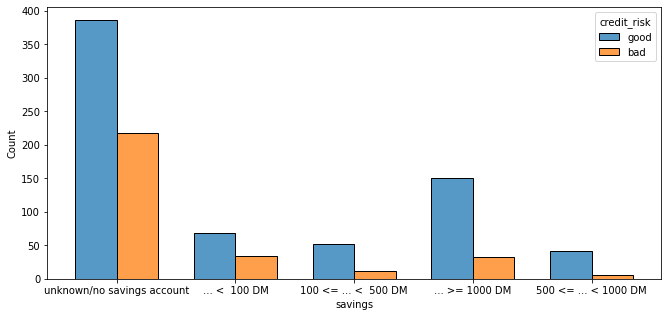

In [212]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
sns.histplot(data = data, x = 'savings', hue='credit_risk',multiple="dodge", ax= ax,shrink=.7)
fig.show()

In [213]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

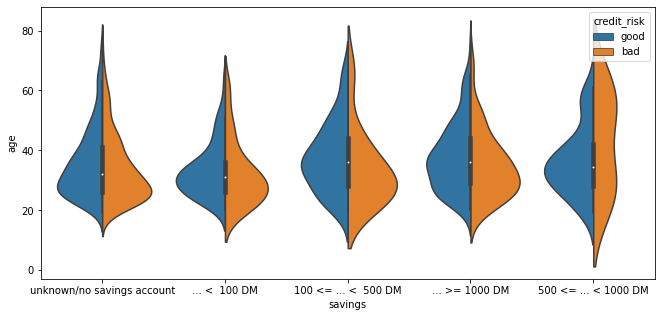

In [214]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
ax = sns.violinplot(x="savings", y="age", data=data, hue = 'credit_risk', ax = ax, split=True)
fig.show()

In [215]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

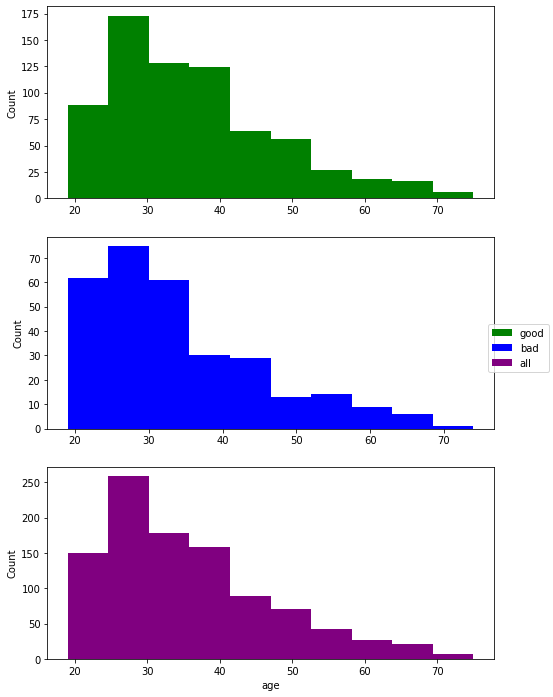

In [216]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
for i in range(len(ax)):
  ax[i].set_ylabel('Count')
ax[0].hist(data = data[data['credit_risk'] == 'good'], x = 'age', color = 'green', label = 'good')
ax[1].hist(data = data[data['credit_risk'] == 'bad'], x = 'age', color = 'blue', label = 'bad')
ax[2].hist(data = data, x = 'age', color = 'purple', label = 'all')
ax[2].set_xlabel("age")
fig.legend(loc = 'center right')


In [217]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

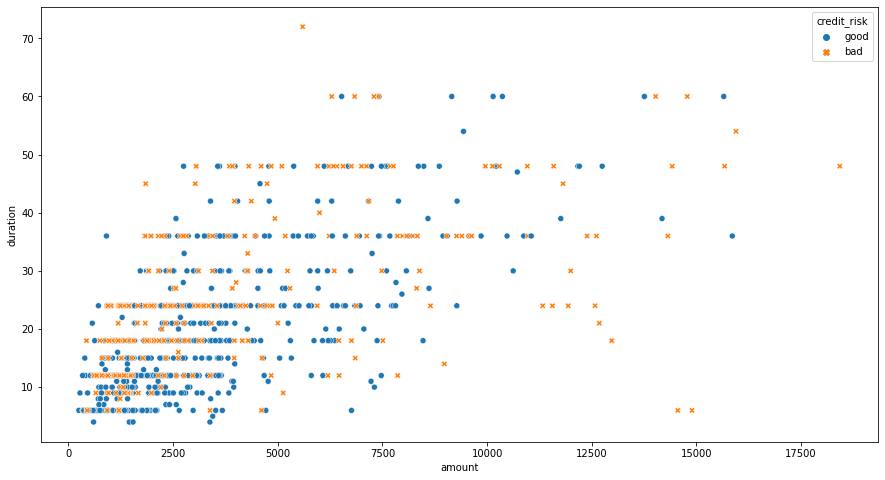

In [218]:
fig, ax = plt.subplots(1, figsize=(15, 8))
sns.scatterplot(x = 'amount', y = 'duration', data = data, hue = 'credit_risk', style = 'credit_risk' ,ax = ax)

In [219]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

<ipython-input-220-b73951bbe022>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'age')

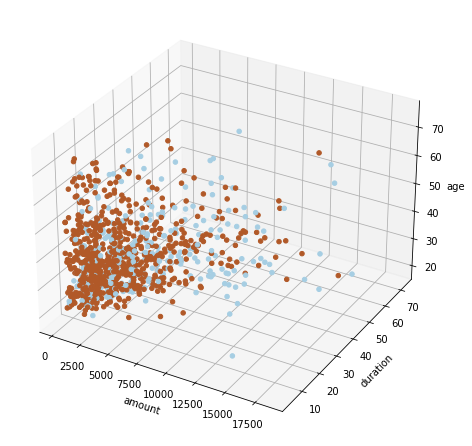

In [220]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)


g = ax.scatter(data['amount'], data['duration'], data['age'], c=data['credit_risk'] == 'good' , marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('amount')
ax.set_ylabel('duration')
ax.set_zlabel('age')

In [221]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [222]:
numeric_features= ['duration','amount','age']
categorical_features = ['status', 'credit_history', 'purpose','personal_status_sex','other_debtors','property','other_installment_plans','housing','job']
categorical_binary_features = ['telephone','foreign_worker','credit_risk']
ordinal_features = ['savings','employment_duration','installment_rate','number_credits','people_liable','present_residence']

In [223]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data[categorical_binary_features + ordinal_features] = enc.fit_transform(data[categorical_binary_features + ordinal_features])

In [224]:
data = data.drop(categorical_features, axis = 1)

In [225]:
data

,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,4.0,2.0,2.0,3.0,21,0.0,0.0,0.0,0.0,1.0
1,9,2799,4.0,0.0,1.0,0.0,36,1.0,1.0,0.0,0.0,1.0
2,12,841,0.0,1.0,1.0,3.0,23,0.0,0.0,0.0,0.0,1.0
3,12,2122,4.0,0.0,0.0,0.0,39,1.0,1.0,0.0,1.0,1.0
4,12,2171,4.0,0.0,2.0,3.0,38,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,4.0,0.0,1.0,3.0,21,0.0,1.0,0.0,0.0,0.0
996,24,2303,4.0,3.0,2.0,2.0,45,0.0,0.0,0.0,0.0,0.0
997,21,12680,1.0,3.0,2.0,3.0,30,0.0,0.0,1.0,0.0,0.0
998,12,6468,1.0,4.0,1.0,2.0,52,0.0,0.0,1.0,0.0,0.0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [226]:
from collections import defaultdict 
def knn(X):
  k = 27
  X_tr = X_train.copy()
  y_tr = y_train.copy()
  X_tr = X_tr - X.reshape(1,-1)
  X_tr = X_tr * X_tr
  X_tr = np.sum(X_tr,axis= 1)
  data_train = sorted(np.concatenate([X_tr.reshape(-1,1), y_tr.reshape(-1,1)], axis = 1).tolist(), key = lambda x: x[0])
  dif_types = defaultdict(int)
  for i in range(k):
    dif_types[data_train[i][1]] += 1

  most_popular_value = 0
  number_of_met = 0
  for x in dif_types:
 #   dif_types[x] /= sum(y_train == x)
    if dif_types[x] > number_of_met:
      most_popular_value = x
      number_of_met = dif_types[x]
  return most_popular_value




def predict(Xtest: np.array) -> np.array:
  answer = map(knn, Xtest)
  print(answer)
  return np.array(list(answer))

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

<ipython-input-226-011581980558>:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.664